# Project 1 -&emsp;Write a Data Science Blog Post<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;StackOverflow 2020


In this project, I decided to investigate what topics or learning sources I should focus on further to become a good data scientist and how I can achieve this.
Since I rely a lot on the Internet as a knowledge base in my professional environment as a software developer, I decided to use the [StackOverflow Developer Survey from Year 2020](https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020) from Kaggle to do this.

To answer my questions in a structured way, I will use the **CRISP-DM** process, which is a cross-industry process for data mining:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

### Blog at Medium:
Here you can find the link to my blog report on [medium](https://danieljaensch.medium.com/which-developer-group-uses-the-stackoverflow-platform-the-most-bab8d7d98e35?source=friends_link&sk=0e32e39b45b0e2e9e0124a6c57f4e85d)

<hr>

## 1. Business Understanding

As a data scientist, I am interested in understanding what topics or learning sources I should focus on to get a good foothold in this field. I would also like to further evaluate for myself how I can best apply this knowledge I have learned here to my current job as a development engineer in the automotive industry.

To get a first overview I asked myself these 4 main questions:

**Business Questions:**

1. What percentage of each country participated in the survey?
2. Which developer group uses StackOverflow the most in the world?
3. Which developer group uses StackOverflow out of the 5 most used countries?
4. How many hours do most 3 developer groups work per week on average?

These questions focus on answering the personal questions for me: Which development activity is currently most in demand? and Which development activity is thus also most in demand in the future?

I can only interpolate these last two questions through several survey analyses from the last few years and this would go beyond the scope of this project. Therefore, I will move the analysis and extrapolation of this information to another private project.

## 2. Data Understanding

Below we see the public StackOverflow survey from the year 2020 from [Kaggle](https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020).

With nearly 65,000 responses fielded from over 180 countries and dependent territories, our 2020 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open-source software.

### Manage python imports

In [1]:
# ---- imports -------
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# --------------------

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

### A Look at the Data
Load the survey results and the survey schema and have a first look at these datas.

In [3]:
# read the survey results
df_raw_results = pd.read_csv('./data-2020/survey_results_public.csv')
df_raw_results.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### Are there any missing values or other unusual points?

In [4]:
df_raw_results.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [5]:
# how many entries / columns are inside the survey
num_rows = df_raw_results.shape[0]
num_columns = df_raw_results.shape[1]
print('entries: {} \ncolumns: {}'.format( num_rows, num_columns ))

entries: 64461 
columns: 61


#### conclusion:
The data in the file: `survey_results_public.csv` is the result of the survey, with a total of 61 columns and 64464 entries.

In [6]:
# read the survey schema
df_raw_schema = pd.read_csv('./data-2020/survey_results_schema.csv')
df_raw_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


#### conclusion:
The file `survey_results_schema.csv` provides the survey schema and the questions that correspond to each column name.

<hr>

### Question 1: &emsp;What percentage of each country participated in the survey?
Let's take a first look at the survey data and see which countries participated in this survey. Are there any initial noticeable trends here?

### Gathering & Wrangling

In [7]:
# count all countries which participated in this survey
df_country = df_raw_results['Country'].value_counts( dropna=False ).reset_index()
df_country.rename(columns={'Country': 'count'}, inplace=True)                  # rename column to count
df_country.rename(columns={'index': 'country'}, inplace=True)                  # rename column to country
df_country['percent'] = df_country['count'] / np.sum( df_country['count'] )    # calculate the percentage

df_country.sort_values(by=['count'], ascending=False, inplace=True)            # sort by the column 'count'
df_country.head(5)

,country,count,percent
0,United States,12469,0.193435
1,India,8403,0.130358
2,United Kingdom,3896,0.060440
3,Germany,3890,0.060347
4,Canada,2191,0.033990


### Analyze and Visualize

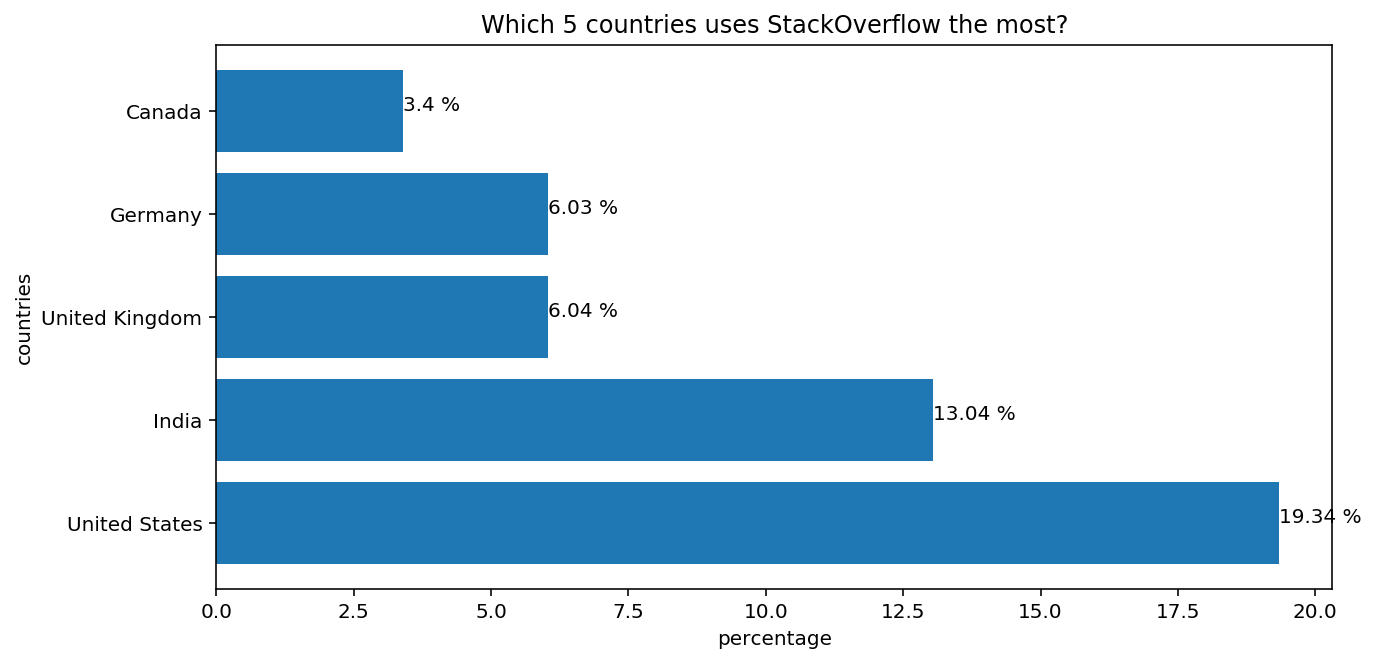

In [8]:
plt.figure(figsize=(10,5))

# plot only the first-5-most-relevant-countries
df_country_plot = df_country.iloc[0:5]

# store the most-counries-which-uses-stackoverflow
most_countries = df_country_plot['country'].values

# create horizontal bars
y_axis_values = df_country_plot['country']
x_axis_values = df_country_plot['percent']*100
plt.barh(y=y_axis_values, width=x_axis_values);

# add headline and labels
plt.title('Which 5 countries uses StackOverflow the most?');
plt.xlabel('percentage')
plt.ylabel('countries') 

# show the value inside the diagram
for index, value in enumerate( list( x_axis_values ) ):
    str_value = str( float("{:.2f}".format(value)) ) + ' %'
    plt.text(value, index, str_value)

plt.show()

### conclusion:
As you can see, the 5 most relevant countries where developers use the StackOverflow platform are: United-States, India, United-Kingdom, Germany and Canada.

Of course, this may also be due to the fact that, based on this survey, only these countries were most involved in the survey. Whether other countries would have been among the top 5 is only speculative and no statement can be made about this. Because in the said period where the survey was made, only these data were collected. Therefore, let's continue to look at this data.

<hr>

### Question 2: &emsp;Which developer group uses StackOverflow the most in the world?
Now that we've figured out the 5 most relevant countries where the StackOverflow platform is used: What about the developer groups? Which are the most represented here worldwide in these surveys? Or to put it another way: Which developer group needs a lively exchange of knowledge to do their job well?

### Gathering & Wrangling
The category 'DevType' is a multiple choice field and can therefore contain several job descriptions.
Therefore, each job name must be extracted and counted individually.

In [9]:
# create a list of all individual job names
list_devTypes = ['Academic researcher', 
                'Data or business analyst',
                'Data scientist or machine learning specialist Database administrator',
                'Designer',
                'Developer, back-end',
                'Developer, desktop or enterprise applications',
                'Developer, embedded applications or devices',
                'Developer, front-end',
                'Developer, full-stack',
                'Developer, game or graphics',
                'Developer, mobile',
                'Developer, QA or test',
                'DevOps specialist',
                'Educator',
                'Engineer, data',
                'Engineer, site reliability',
                'Engineering manager',
                'Marketing or sales professional',
                'Product manager',
                'Scientist',
                'Senior Executive (C-Suite, VP, etc.)',
                'System administrator']

In [10]:
def get_developer_type_count( df_input ):
    '''
    This function goes through the whole dataframe, separates each job name and counts it.
    The result job name + count is returned in a new dataframe.
    
    @param  df_input  : the input dataframe (for example the whole raw dataframe from the survey)
    @return df_result : a dataframe only with the result data
    '''
    
    # remove all nan values
    df_input['DevType'].fillna('not listed', inplace=True)

    df_result = pd.DataFrame()
    num_rows = df_input.shape[0]

    # go through the whole raw dataframe
    for df_index in range(0, num_rows):
        # extract the whole developer type in one string
        value_devtype = df_input.loc[df_index]['DevType']

        # iterate over the whole list of possible job-names / developer-types
        for dev_index in range(0, len(list_devTypes)):
            const_devtype = list_devTypes[dev_index]
            
            # is the single-developer-type inside the whole-string ?
            if const_devtype in value_devtype:
                if const_devtype in list( df_result.index ):
                    df_result.loc[ const_devtype, 'count' ] += 1    # increment the already existing entry
                else:
                    df_result.loc[ const_devtype, 'count' ] = 1     # create new entry
            # --- then ----
        # ---- for ----

        print('checking index: {} of {}'.format( df_index, num_rows-1), end='\r')
    # ---- for ----
    
    return df_result
# ----------------------------------------


df_results = df_raw_results.copy( deep=True )           # make a deep copy
df_devtype = get_developer_type_count( df_results )     # get the amount of each job-name / developer-type

In [11]:
def get_developer_type_preparation( df_input ):
    '''
    This function goes through the given dataframe and prepares the data for plotting
    
    @param  df_input  : the input dataframe
    @return df_result : a prepared dataframe for plotting
    '''

    df_result = df_input.reset_index()                                          # create new index
    df_result.rename(columns={'index': 'devtype'}, inplace=True)                # rename column to count
    df_result['percent'] = df_result['count'] / np.sum( df_result['count'] )    # calculate the percentage

    df_result.sort_values(by=['count'], ascending=False, inplace=True)    # sorting
    
    return df_result
# ----------------------------------------


df_devtype_plot = get_developer_type_preparation( df_devtype )   # prepare data for plotting
df_devtype_plot.head(5)

,devtype,count,percent
5,"Developer, back-end",27228.0,0.186411
1,"Developer, full-stack",27125.0,0.185706
4,"Developer, front-end",18296.0,0.125260
0,"Developer, desktop or enterprise applications",11784.0,0.080677
2,"Developer, mobile",9482.0,0.064917


### Analyze and Visualize

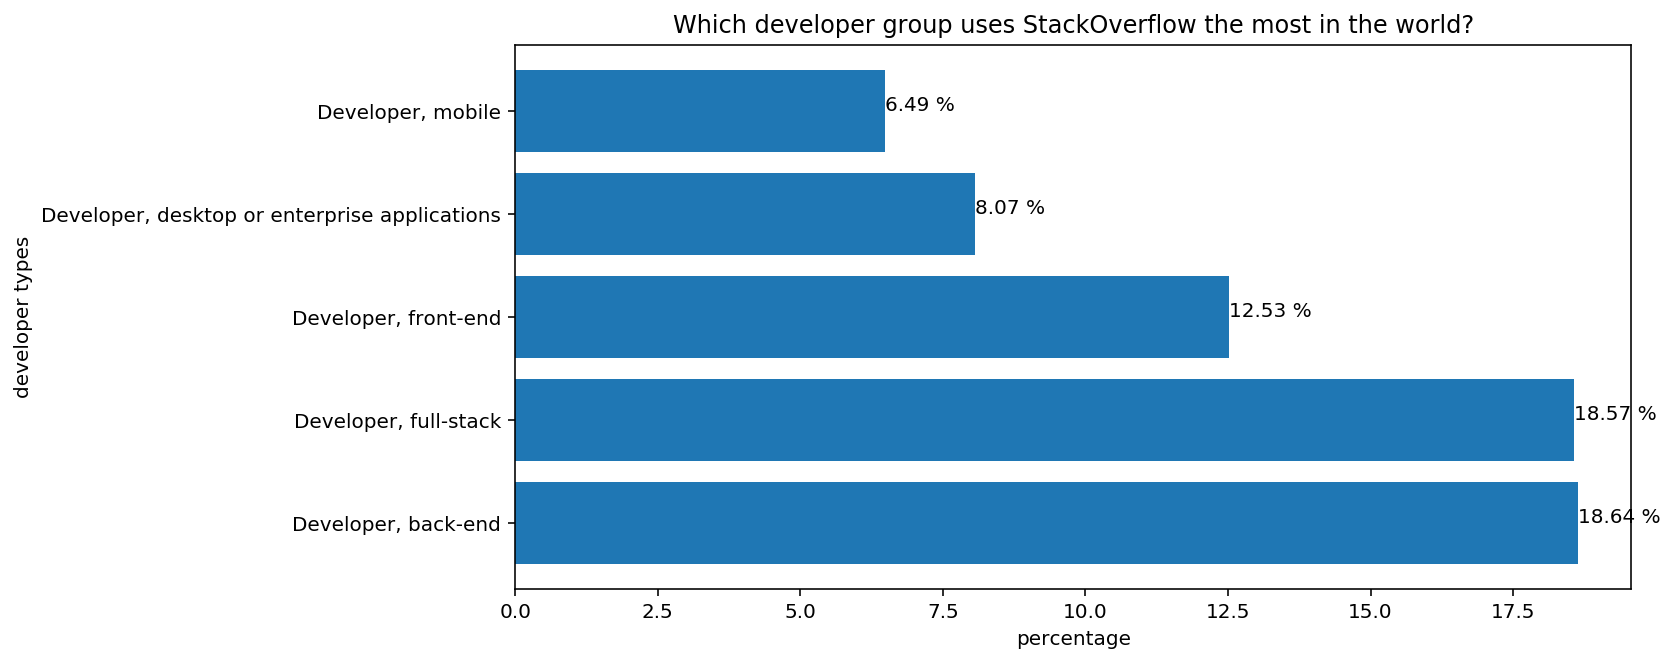

In [12]:
# plot the results
plt.figure(figsize=(10,5))

# plot only the first 5th developer groups
df_devtype_plot = df_devtype_plot.iloc[0:5]

# create horizontal bars
y_axis_values = df_devtype_plot['devtype']
x_axis_values = df_devtype_plot['percent']*100
plt.barh(y=y_axis_values, width=x_axis_values);

# add headline and labels
plt.title('Which developer group uses StackOverflow the most in the world?');
plt.xlabel('percentage')
plt.ylabel('developer types') 

# show the value inside the diagram
for index, value in enumerate( list( x_axis_values ) ):
    str_value = str( float("{:.2f}".format(value)) ) + ' %'
    plt.text(value, index, str_value)

plt.show()

### conclusion:
As you can see, the 5 most relevant developer groups are those that use the StackOverflow platform the most worldwide: Developer-back-end, Developer-full-stack, Developer-front-end, Developer-desktop-or-enterprise-applications and Developer-mobile.

The developer group that is most strongly represented is`Developer-back-end`. As can be seen, this developer group needs the most knowledge exchange to be able to do their work well.

This is an overview of the worldwide usage of StackOverflow by the respective developer groups. 
How does it look like in the 5 most relevant countries? Is there a similar or the same frequency of use? Or is it significantly different?

<hr>

### Question 3: &emsp;Which developer group uses StackOverflow out of the 5 most used countries? <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Are there significant differences here?
Having looked at the global distribution of developer groups, we are left with the questions: are there any segnificant differences in the distribution of developer groups from globally to the 5 most relevant countries? Which developer group is most in demand in these countries? Or in other words, which developer group is most in need of knowledge sharing in these countries?

### Gathering & Wrangling

In [13]:
df_results = df_raw_results.copy( deep=True )                  # make a deep copy
df_country_devtype = {}                                        # create new dictionary

for element_country in most_countries:                         # interate over all most-relevant-countries
    print('checking country: {}'.format( element_country ))
    df = df_results[df_results['Country'] == element_country]

    df.reset_index(drop=True, inplace=True)                    # reset indexing
    df_devtype = get_developer_type_count( df )                # count all developer types
    df_devtype = get_developer_type_preparation( df_devtype )  # prepare 
    
    df_devtype.reset_index(drop=True, inplace=True)            # reset indexing
    df_country_devtype[element_country] = df_devtype           # add dataframe to dictionary
    print()
# ---- for ----

checking country: United States
checking index: 12468 of 12468
checking country: India
checking index: 8402 of 8402
checking country: United Kingdom
checking index: 3895 of 3895
checking country: Germany
checking index: 3889 of 3889
checking country: Canada
checking index: 2190 of 2190


In [14]:
# see the results of developer types of the first most-relevant-country
df_country_devtype[ most_countries[0] ].head()

,devtype,count,percent
0,"Developer, full-stack",6008.0,0.193882
1,"Developer, back-end",5383.0,0.173712
2,"Developer, front-end",3752.0,0.121079
3,"Developer, desktop or enterprise applications",2473.0,0.079805
4,DevOps specialist,1443.0,0.046566


### Analyze and Visualize

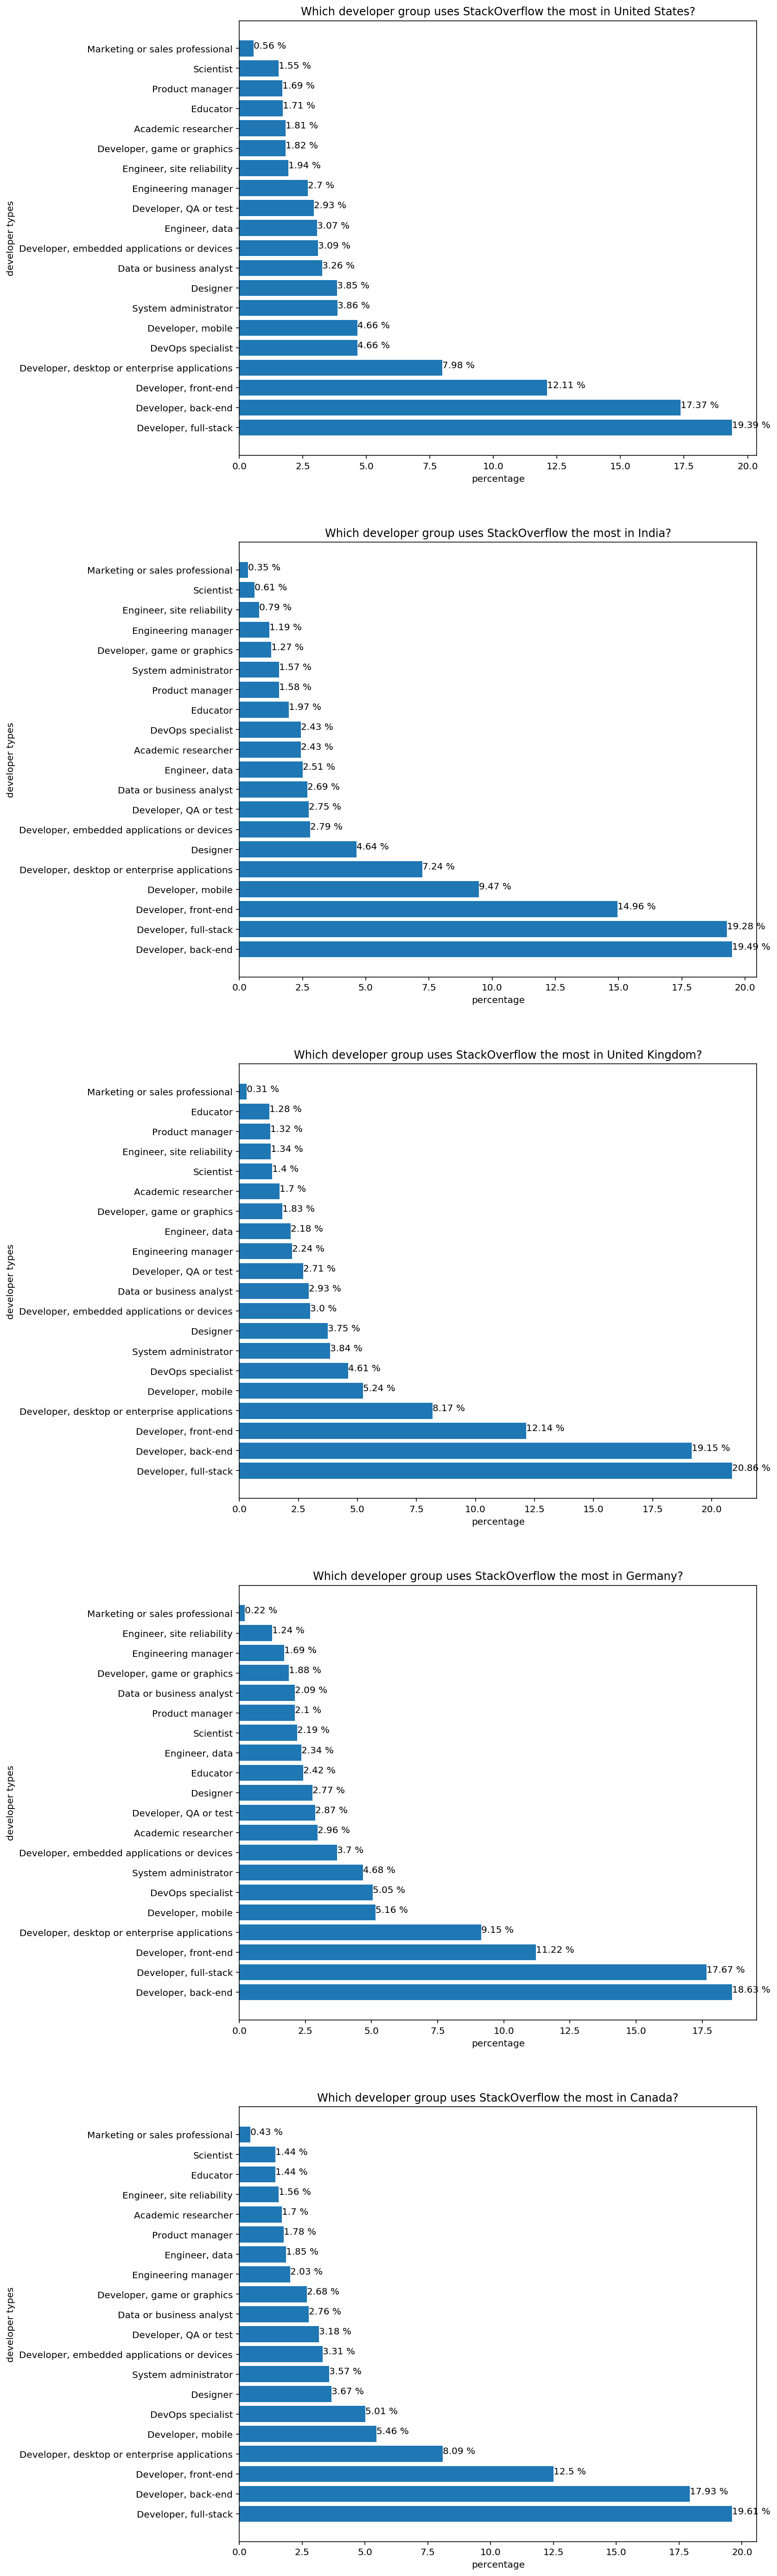

In [15]:
len_most_countries = len(most_countries)

# create subplots and set size of each subplot
fig, axs = plt.subplots( len_most_countries, 1, figsize=(10,10*len_most_countries) )

for idx_country in range(0, len_most_countries):
    # plot only the selected coutry-developer-group-dataframe
    df_devtype_plot = df_country_devtype[ most_countries[idx_country] ]

    # create horizontal bars
    y_axis_values = df_devtype_plot['devtype']
    x_axis_values = df_devtype_plot['percent']*100
    axs[idx_country].barh(y=y_axis_values, width=x_axis_values);

    # add headline and labels
    axs[idx_country].set_title('Which developer group uses StackOverflow the most in ' + most_countries[idx_country]+ '?');
    axs[idx_country].set_xlabel('percentage')
    axs[idx_country].set_ylabel('developer types') 

    # show the value inside the diagram
    for index, value in enumerate( list( x_axis_values ) ):
        str_value = str( float("{:.2f}".format(value)) ) + ' %'
        axs[idx_country].text(value, index, str_value)
# ---- for ----

plt.show()

### conclusion:
As you can see, in the 5 most relevant countries, the developer groups that use the StackOverflow platform the most are: Developer-back-end, Developer-full-stack and Developer-front-end.

This result is similar to the worldwide representation of the developer groups that use the StackOverflow platform the most. However, there are small significant differences in the frequency and ranking in the individual countries as to which developer group is ranked first and second in the country. In summary, it can be said that the 3 developer groups are the same as in the worldwide representation of these.

<hr>

### Question 4: &emsp;How many hours do most 3 developer groups work per week on average? <br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Or to put it another way:<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In which country do the developer groups work the most?
Now it is interesting, how many hours do these 3 most relevant developer groups work on average per week? Are there significant differences between the individual countries?

### Gathering & Wrangling

In [16]:
# As we have already seen, the most wanted developer groups are:
list_most_devTypes = ['Developer, back-end','Developer, full-stack', 'Developer, front-end',]

In [17]:
def get_developer_type_workhours_count( df_input ):
    '''
    This function goes through the whole dataframe, separates each job name and counts the working hours of this job.
    The result job name + working hours in total + count of counted items is returned in a new dataframe.
    
    @param  df_input  : the input dataframe (for example the whole raw dataframe from the survey)
    @return df_result : a dataframe only with the result data
    '''

    # remove all nan values
    df_input['DevType'].fillna('not listed', inplace=True)
    df_input['WorkWeekHrs'].fillna(0, inplace=True)

    df_result = pd.DataFrame()
    num_rows = df_input.shape[0]

    # go through the whole raw dataframe
    for df_index in range(0, num_rows):
        # extract the whole developer type in one string
        value_devtype = df_input.loc[df_index]['DevType']

        # iterate over the whole list of possible job-names / developer-types
        for dev_index in range(0, len(list_most_devTypes)):
            const_devtype = list_most_devTypes[dev_index]

            # is the single-developer-type inside the whole-string ?
            if const_devtype in value_devtype:
                value_comptotal = df_input.loc[df_index]['WorkWeekHrs']
                value_increase = value_comptotal > 0
                
                if const_devtype in list( df_result.index ):
                    df_result.loc[ const_devtype, 'WorkWeekHrs' ] += value_comptotal    # increment the already existing entry
                    df_result.loc[ const_devtype, 'count' ] += value_increase           # increment the already existing entry
                else:
                    df_result.loc[ const_devtype, 'WorkWeekHrs' ] = value_comptotal     # create new entry
                    df_result.loc[ const_devtype, 'count' ] = 1                         # create new entry
            # --- then ----
        # ---- for ----

        print('checking index: {} of {}'.format( df_index, num_rows-1), end='\r')
    # ---- for ----
    
    return df_result
# ----------------------------------------

In [18]:
df_results = df_raw_results.copy( deep=True )                       # make a deep copy
df_workhours_country_devtype = {}                                   # create new dictionary


for element_country in most_countries:                              # interate over all most-relevant-countries
    print('checking country: {}'.format( element_country ))
    df = df_results[df_results['Country'] == element_country]

    df.reset_index(drop=True, inplace=True)                         # reset indexing
    df_devtype = get_developer_type_workhours_count( df )           # count all developer types
    
    # preparation for visualisation
    df_devtype = df_devtype.reset_index()                           # create new index
    df_devtype.rename(columns={'index': 'devtype'}, inplace=True)   # rename column to count
    df_devtype['avrg_WorkWeekHrs'] = df_devtype['WorkWeekHrs'] / df_devtype['count']
    
    df_devtype.reset_index(drop=True, inplace=True)                 # reset indexing
    df_workhours_country_devtype[element_country] = df_devtype      # add dataframe to dictionary
    print()
# ---- for ----

checking country: United States
checking index: 12468 of 12468
checking country: India
checking index: 8402 of 8402
checking country: United Kingdom
checking index: 3895 of 3895
checking country: Germany
checking index: 3889 of 3889
checking country: Canada
checking index: 2190 of 2190


In [19]:
# see the result of developer types of the first most-relevant-country
df_workhours_country_devtype[ most_countries[0] ].head()

,devtype,WorkWeekHrs,count,avrg_WorkWeekHrs
0,"Developer, back-end",199130.210000,4765.0,41.790180
1,"Developer, front-end",135435.710000,3274.0,41.367046
2,"Developer, full-stack",222625.821111,5342.0,41.674620


### Analyze and Visualize

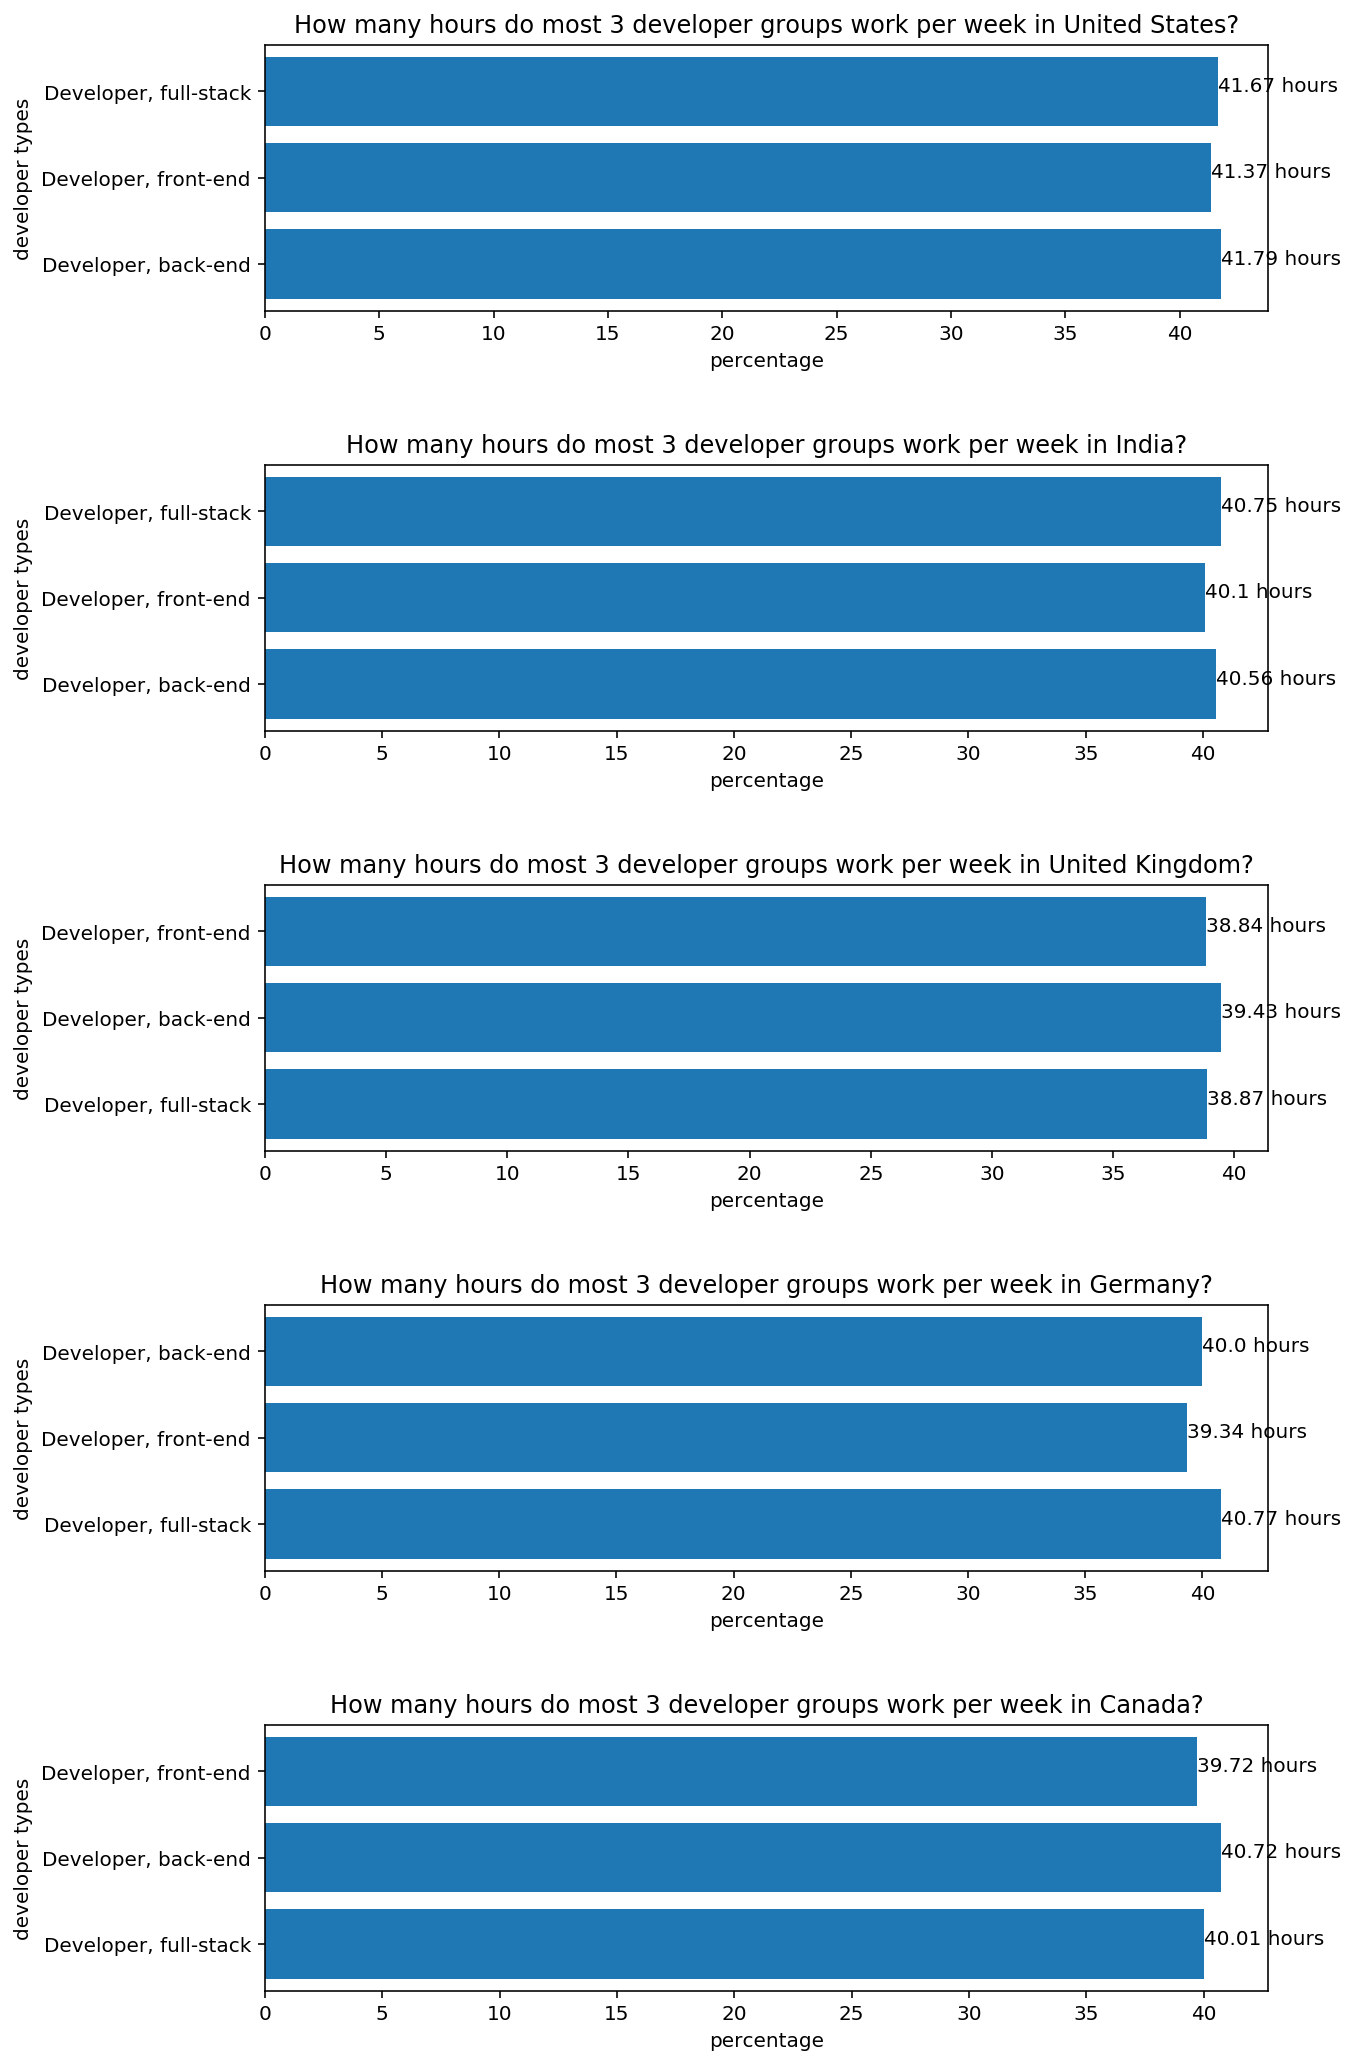

In [20]:
len_most_countries = len(most_countries)

# create subplots and set size of each subplot
fig, axs = plt.subplots( len_most_countries, 1, figsize=(10,3*len_most_countries) )

for idx_country in range(0,len_most_countries):
    # plot only the selected coutry-developer-group-dataframe
    df_devtype_plot = df_workhours_country_devtype[ most_countries[idx_country] ]

    # create horizontal bars
    y_axis_values = df_devtype_plot['devtype']
    x_axis_values = df_devtype_plot['avrg_WorkWeekHrs']
    axs[idx_country].barh(y=y_axis_values, width=x_axis_values);

    # add headline and labels
    axs[idx_country].set_title('How many hours do most 3 developer groups work per week in ' + most_countries[idx_country]+ '?');
    axs[idx_country].set_xlabel('percentage')
    axs[idx_country].set_ylabel('developer types') 

    # show the value inside the diagram
    for index, value in enumerate( list( x_axis_values ) ):
        str_value = str( float("{:.2f}".format(value)) ) + ' hours'
        axs[idx_country].text(value, index, str_value)
# ---- for ----

fig.tight_layout(pad=3.0)    # add some space between the subplots
plt.show()

### conclusion:
As can be seen, the working time of these 3 main developer groups is on average among the 5 most relevant countries, highest in the United States and lowest in the United Kingdom. Since the survey was conducted in 2020, the year in which the Corona pandemic began, with personal and economic difficulties, this trend is also noticeable here. 

Furthermore, it gives a first insight into the average weekly working hours of the 3 main developer groups in each country. What relation these average weekly working hours have in relation to the structural working conditions, existing curltural and economic laws could also be further investigated. Whether a relation can be established here as well or this remains only a hypothesis.

<hr>

### further ideas:


In addition, the programming language used, the gender of the developers, the age, the industry and perhaps even the way this platform is used could also tell StackOverflow how to better help these groups of developers do their jobs even more easily, efficiently.

#### Hypothesis
According to press information from the year 2020, there were heaps of layoffs and job changes in many places in the U.S., so it can be assumed that the people who were allowed to keep their jobs probably put up with a little more working time here in order to be able to keep them. This thesis and the resulting human behavior of these developer groups could be further investigated, proven or disproven. This would require more economic data from the country. Unfortunately, this is not currently possible based on these surveys from StackOverflow 2020. Since this survey took place in February 2020. At that time, the Corona pandemic was not yet truly segnificant. Therefore, it is interesting to examine and compare the survey from StackOverflow from 2021 in this regard. It remains to be seen.

<hr>